In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

# Parâmetros
T0=90 # temperatura inicial do café
T_amb = 25 # T do ambiente
k=0.005 # cte de esfriamento
t_span=[0, 1000] # tempo
t_eval=np.linspace(t_span[0], t_span[1], 200)


In [2]:
# Definição da EDO
def dTdt(t,T):
    return -k*(T-T_amb)


In [3]:
# 1. Solução Analítica obtida em questão 1
T_analytical=T_amb+(T0-T_amb)*np.exp(-k*t_eval)


In [4]:
# 2. Método de Runge-Kutta 4a ordem (RK4)
def rk4(f, T0, t):
    T = np.zeros(len(t))
    T[0] = T0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], T[i-1])
        k2 = f(t[i-1] + h/2, T[i-1] + h*k1/2)
        k3 = f(t[i-1] + h/2, T[i-1] + h*k2/2)
        k4 = f(t[i-1] + h, T[i-1] + h*k3)
        T[i] = T[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return T

T_rk4=rk4(dTdt, T0, t_eval)


In [5]:
# 3. Solução com solve_ivp
sol=solve_ivp(dTdt, t_span, [T0], t_eval=t_eval, method='RK45')
T_ivp=sol.y[0]


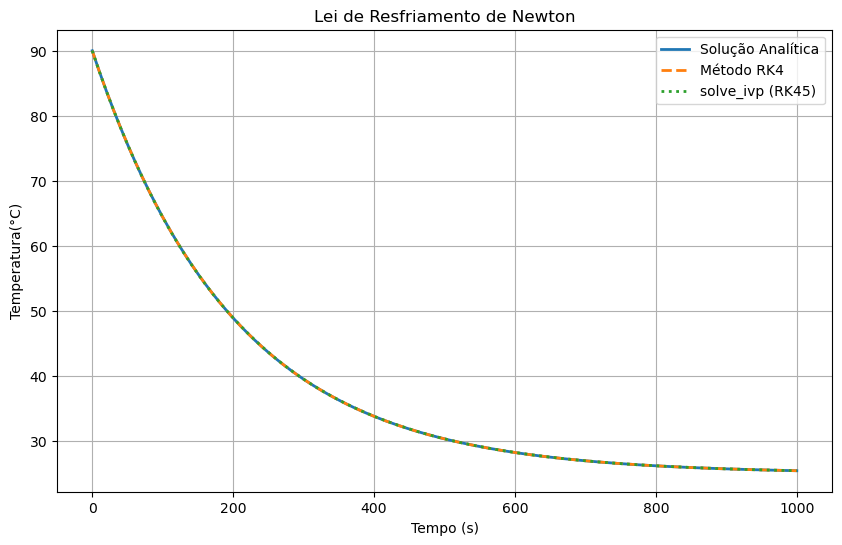

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(t_eval, T_analytical, label='Solução Analítica', linewidth=2)
plt.plot(t_eval, T_rk4, '--', label='Método RK4', linewidth=2)
plt.plot(t_eval, T_ivp, ':', label='solve_ivp (RK45)', linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura(°C)')
plt.title('Lei de Resfriamento de Newton')
plt.grid(True)
plt.legend()
#plt.savefig('sol_anal.png',dpi=300)
plt.show()
